In [1]:
import VizKG.visualize as vkg

/Users/carboni/.local/lib/python3.8/site-packages/plotly/express/_core.py:1594: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



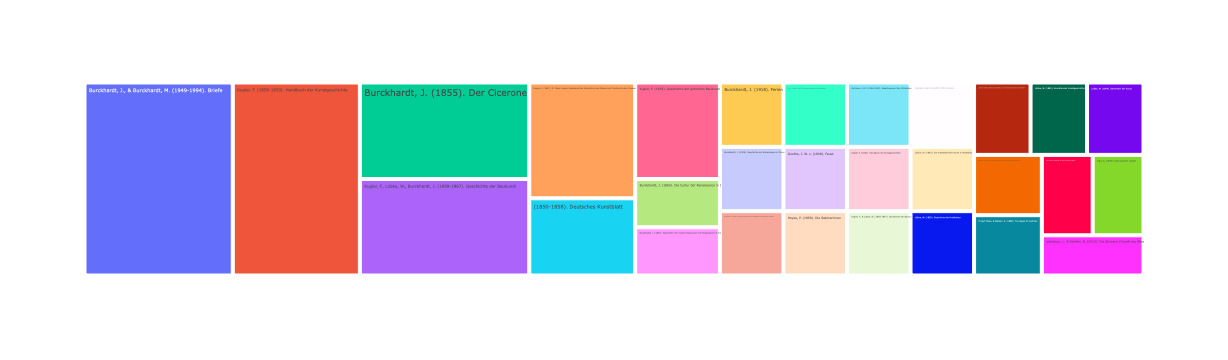

In [11]:
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
SELECT ?labelReference ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  ?timespan crm:P81a_end_of_the_begin ?time .
  ?place crm:P89_falls_within <https://burckhardtsource.org/place/B7FB64C1-6E71-447F-9FAE-813A2BE8F945> ;
   rdfs:label ?label ;
   <http://www.cidoc-crm.org/cidoc-crm/P168_place_is_defined_by> ?coordinates .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a crm:E73_Information_Object ;
          rdfs:label ?labelReference .
  
}

GROUP BY ?letter ?label ?labelReference ?time ?class
ORDER BY ?time ?labelReference
LIMIT 50
"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
timeline = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="treemap")
timeline.plot()

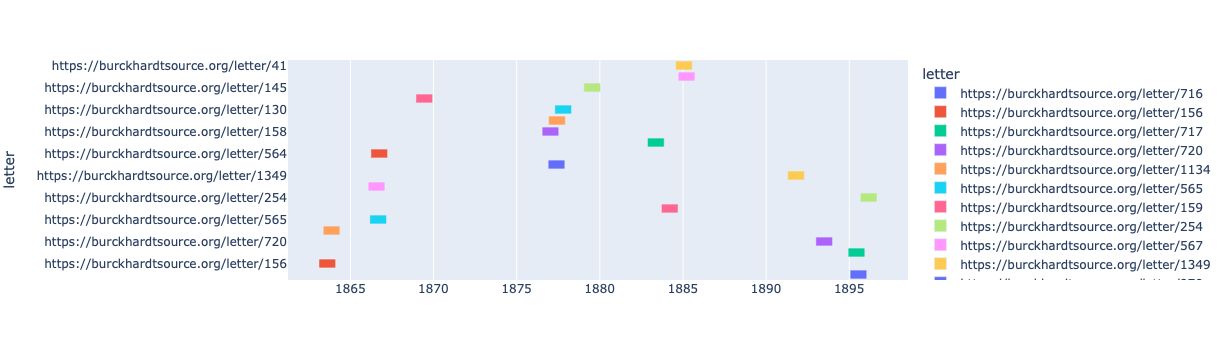

In [36]:
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
SELECT ?letter ?label ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
               
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?letter rdfs:label ?label .
  
}
LIMIT 20
"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="timeline")
chart.plot()

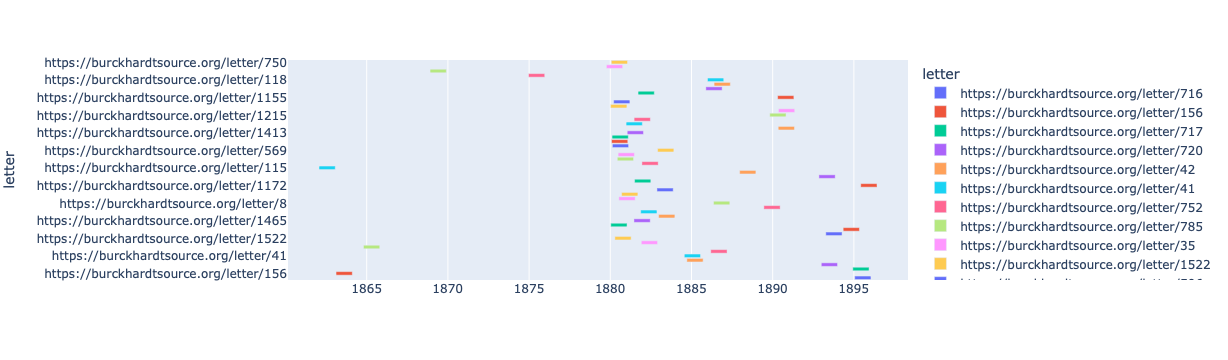

In [41]:
# Timeline of the letters received from Germany

sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
SELECT ?letter ?time WHERE {
  
    ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
               
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?place crm:P89_falls_within <https://burckhardtsource.org/place/B7FB64C1-6E71-447F-9FAE-813A2BE8F945> .

 
  
  ?letter rdfs:label ?label .
  
}
LIMIT 50
"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="timeline")
chart.plot()

In [31]:
# Places
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
SELECT ?letter ?label ?coordinates WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  ?timespan crm:P81a_end_of_the_begin ?time .
  ?place 
   rdfs:label ?label ;
   <http://www.cidoc-crm.org/cidoc-crm/P168_place_is_defined_by> ?coordinates .
  
  
}

LIMIT 100
"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="map")
chart.plot()

In [ ]:
# Places an author mention in his letter when wrote from Germany
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
SELECT ?letter ?label ?labelReference ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  ?timespan crm:P81a_end_of_the_begin ?time .
  ?place crm:P89_falls_within <https://burckhardtsource.org/place/B7FB64C1-6E71-447F-9FAE-813A2BE8F945> ;
   rdfs:label ?label ;
   <http://www.cidoc-crm.org/cidoc-crm/P168_place_is_defined_by> ?coordinates .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a crm:E21_Person ;
          rdfs:label ?labelReference .
  
}
LIMIT 50

"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="sunburstchart")
chart.plot()

AttributeError: 'VizKG' object has no attribute 'update_layout'

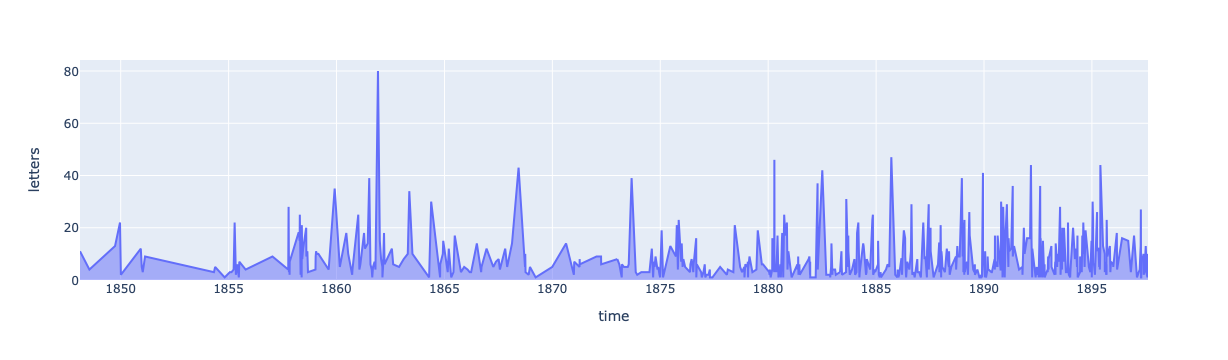

In [48]:
# Places an author mention in his letter when wrote from Germany
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (COUNT(?letter) AS ?letters) ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a ?class ;
          rdfs:label ?labelReference .
  
}
GROUP BY ?time

"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="areachart")
chart.plot()

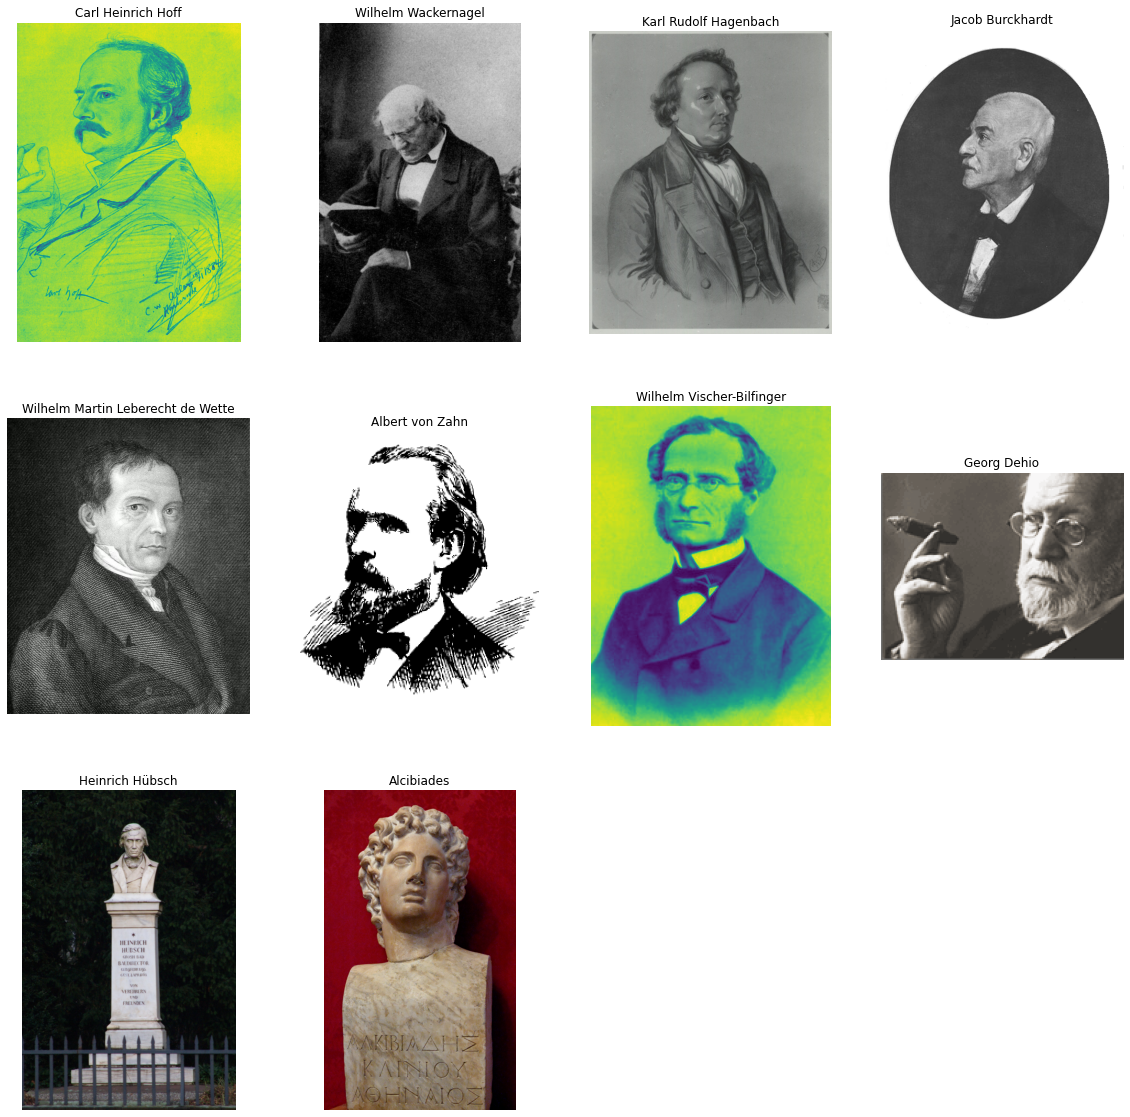

In [52]:
# Persons mentioned in the letters coming from Germany between March and December 1882
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?letter ?pic ?labelReference WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?place crm:P89_falls_within <https://burckhardtsource.org/place/B7FB64C1-6E71-447F-9FAE-813A2BE8F945> ;
   rdfs:label ?label ;
   <http://www.cidoc-crm.org/cidoc-crm/P168_place_is_defined_by> ?coordinates .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a crm:E21_Person ;
          <http://www.researchspace.org/ontology/PX_has_main_representation> ?pic ;
          rdfs:label ?labelReference .
  
  FILTER (?time > "1882-03-01T00:00:00"^^xsd:dateTime && ?time < "1882-12-31T00:00:00"^^xsd:dateTime )
}


"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="imagegrid")
chart.plot()

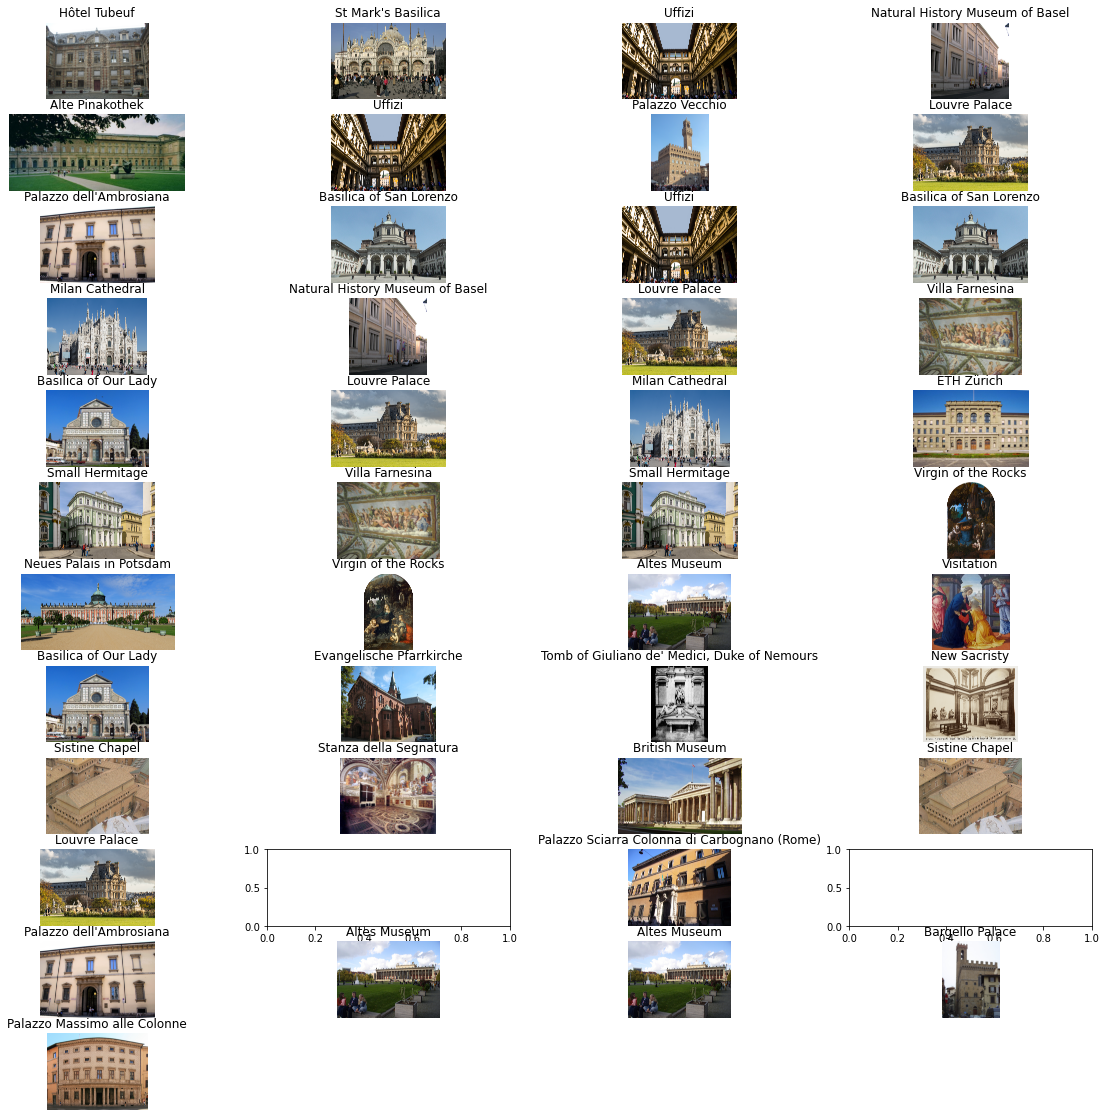

In [59]:
# Persons mentioned in the letters between March 1882 and December 1885
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?letter ?pic ?labelReference ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a crm:E22_Man-Made_Object ;
          <http://www.researchspace.org/ontology/PX_has_main_representation> ?pic ;
          rdfs:label ?labelReference .
  
  FILTER (?time > "1885-03-01T00:00:00"^^xsd:dateTime && ?time < "1889-12-31T00:00:00"^^xsd:dateTime )

}


"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="imagegrid")
chart.plot()

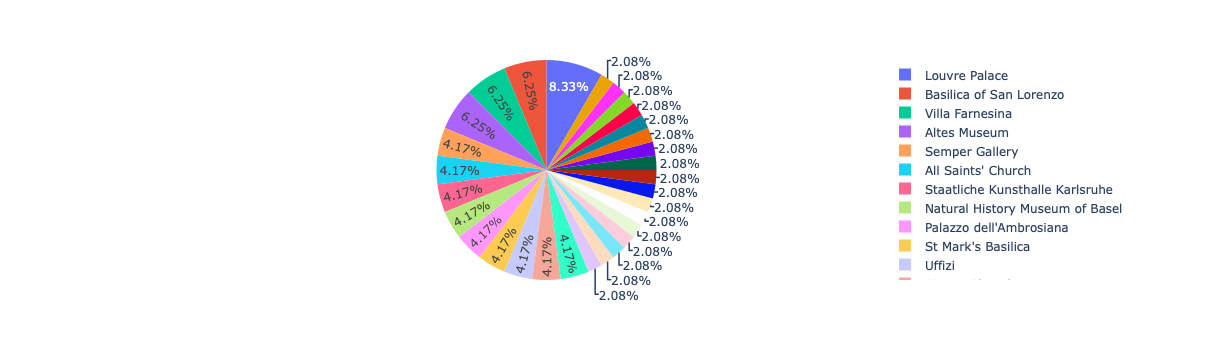

In [67]:
# Persons mentioned in the letters between March 1882 and December 1885
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?letter (COUNT(?pic) AS ?pics) ?labelReference ?time WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced ?letter ;
               crm:P4_has_time-span ?timespan .
  
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  ?letter rdfs:comment ?comment ;
          crm:P67_refers_to ?reference .
  ?reference a crm:E22_Man-Made_Object ;
          <http://www.researchspace.org/ontology/PX_has_main_representation> ?pic ;
          rdfs:label ?labelReference .
  
  FILTER (?time > "1882-03-01T00:00:00"^^xsd:dateTime && ?time < "1887-12-31T00:00:00"^^xsd:dateTime )

}

GROUP BY ?letter ?labelReference ?time
ORDER BY ?time

"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="piechart")
chart.plot()

You haven’t selected the chart type for your query result visualization.
Based on your query result data, we suggest to choose one of the following chart type: ['graph', 'tree', 'table']

We show below two of them ('table', 'graph') as illustrations: 


,class,referenceLabel
0,http://www.cidoc-crm.org/cidoc-crm/E53_Place,https://burckhardtsource.org/place/B6616C85-76...
1,http://www.cidoc-crm.org/cidoc-crm/E53_Place,Berlin
2,http://www.cidoc-crm.org/cidoc-crm/E21_Person,Berthold Riehl
3,http://www.cidoc-crm.org/cidoc-crm/E21_Person,https://burckhardtsource.org/person/4D0AF6FE-F...
4,http://www.cidoc-crm.org/cidoc-crm/E73_Informa...,https://burckhardtsource.org/text/103885
5,http://www.cidoc-crm.org/cidoc-crm/E73_Informa...,"Wölfflin, H. (1890). Die Sixtinische Decke Mic..."
6,http://www.cidoc-crm.org/cidoc-crm/E73_Informa...,https://burckhardtsource.org/text/103886
7,http://www.cidoc-crm.org/cidoc-crm/E73_Informa...,"Wölfflin, H. (1891). Die Jugendwerke des Miche..."


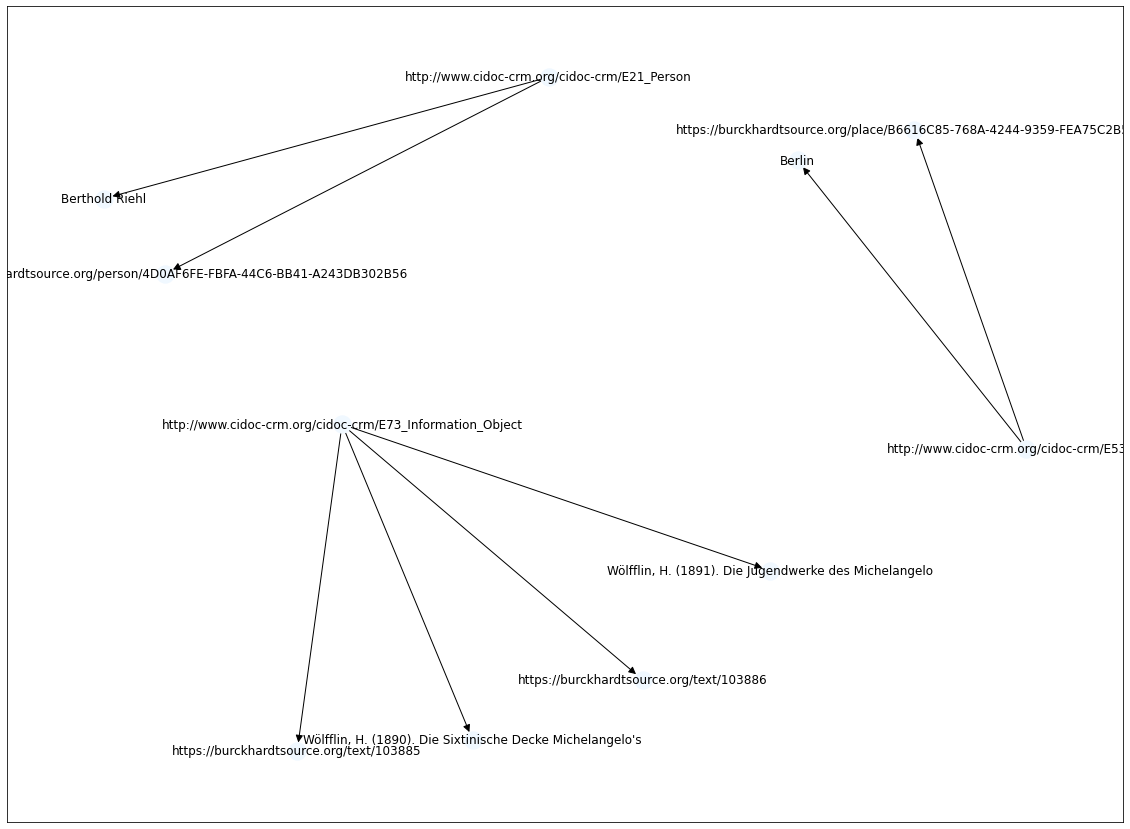

In [89]:
# Persons mentioned in the letters between March 1882 and December 1885
sparql_query = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?class ?referenceLabel WHERE {
  
  ?production crm:P7_took_place_at ?place ;
               crm:P108_has_produced <https://burckhardtsource.org/letter/811> ;
               crm:P4_has_time-span ?timespan .
  
  ?timespan crm:P81a_end_of_the_begin ?time .
  
  <https://burckhardtsource.org/letter/811> crm:P67_refers_to ?reference .
  ?reference a ?class ;
          rdfs:label ??referenceLabel .
 
  
}

limit 20

"""
sparql_service_url = "http://localhost:3030/BUR/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="tree")
chart.plot()